# Pharmaceutical Sales prediction across multiple stores


# Explanatory Data Analysis of Rossman sales

In [2]:
# importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [4]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')
store_data = pd.read_csv('../data/store.csv')

Convert all categorical columns to object across the three datasets

In [5]:
# helper function we are going to use to convert all categorical columns to object across the given datasets
def convert_cat_cols_obj(dataset, col_lst):
    for i in col_lst: 
        dataset = dataset.astype({i:'object'})
    return dataset

In [6]:
## Converting categorical columns in train set into object
train_cols = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']
train_data = convert_cat_cols_obj(train_data, train_cols)

In [7]:
## Converting categorical columns in train set into object
test_cols = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']
test_data = convert_cat_cols_obj(test_data, test_cols)

In [8]:
## Converting categorical columns in store set into object
store_cols = ['StoreType','Assortment','CompetitionOpenSinceMonth','Promo2']
store_data = convert_cat_cols_obj(store_data, store_cols)

In [9]:
## Dealing with cardinality
train_data['StateHoliday'].replace({0:'o','0':'o'},inplace=True)
test_data['StateHoliday'].replace({'0':'o'},inplace=True)

 # Understanding the data

In [10]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,o,1
1,2,5,2015-07-31,6064,625,1,1,o,1
2,3,5,2015-07-31,8314,821,1,1,o,1
3,4,5,2015-07-31,13995,1498,1,1,o,1
4,5,5,2015-07-31,4822,559,1,1,o,1


In [43]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,o,0
1,2,3,4,2015-09-17,1,1,o,0
2,3,7,4,2015-09-17,1,1,o,0
3,4,8,4,2015-09-17,1,1,o,0
4,5,9,4,2015-09-17,1,1,o,0


In [44]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4,2015.0,0,NaN,NaN,NaN


In [14]:
# showing only the integer object description
store_data.describe() 

,Store,CompetitionDistance,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,571.000000,571.000000
mean,558.00000,5404.901079,2008.668857,23.595447,2011.763573
std,322.01708,7663.174720,6.195983,14.141984,1.674935
min,1.00000,20.000000,1900.000000,1.000000,2009.000000
25%,279.50000,717.500000,2006.000000,13.000000,2011.000000
50%,558.00000,2325.000000,2010.000000,22.000000,2012.000000
75%,836.50000,6882.500000,2013.000000,37.000000,2013.000000
max,1115.00000,75860.000000,2015.000000,50.000000,2015.000000


In [15]:
# showing only the integer object description
train_data.describe() 

,Store,Sales,Customers,Year,Month,DayOfMonth
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.773819e+03,6.331459e+02,2.013832e+03,5.846762e+00,1.570279e+01
std,3.219087e+02,3.849926e+03,4.644117e+02,7.773960e-01,3.326097e+00,8.787638e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00
25%,2.800000e+02,3.727000e+03,4.050000e+02,2.013000e+03,3.000000e+00,8.000000e+00
50%,5.580000e+02,5.744000e+03,6.090000e+02,2.014000e+03,6.000000e+00,1.600000e+01
75%,8.380000e+02,7.856000e+03,8.370000e+02,2.014000e+03,8.000000e+00,2.300000e+01
max,1.115000e+03,4.155100e+04,7.388000e+03,2.015000e+03,1.200000e+01,3.100000e+01


In [16]:
 # showing only the integer object description
test_data.describe()

,Id,Store
count,41088.000000,41088.000000
mean,20544.500000,555.899533
std,11861.228267,320.274496
min,1.000000,1.000000
25%,10272.750000,279.750000
50%,20544.500000,553.500000
75%,30816.250000,832.250000
max,41088.000000,1115.000000


In [17]:
#shows row by column value of the train dataset
train_data.shape 

(1017209, 12)

In [18]:
#shows row by column value of the test dataset
test_data.shape 

(41088, 8)

In [19]:
#shows row by column value of the store dataset
store_data.shape 

(1115, 10)

** let see for each column what unique value we have for train test and store data sets **

In [20]:
store_data.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [21]:
train_data.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
Year                 3
Month               12
DayOfMonth          31
dtype: int64

In [22]:
test_data.nunique()

Id               41088
Store              856
DayOfWeek            7
Date                48
Open                 2
Promo                2
StateHoliday         2
SchoolHoliday        2
dtype: int64

Note: from above we can see that our columns respective unique values

this will help us in identifying which value we should use for visualization

In [23]:
print("Joining train set with an additional store information.")

# by specifying inner join we make sure that only those observations 
# that are present in both train and store sets are merged together
train_store = pd.merge(train_data, store_data, how = 'inner', on = 'Store')

print("In total: ", train_store.shape)
train_store.head()

Joining train set with an additional store information.
In total:  (1017209, 21)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,DayOfMonth,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,o,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,o,1,2015,...,30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,o,1,2015,...,29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,o,1,2015,...,28,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,o,1,2015,...,27,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


# Check for seasonality in both training and test sets - are the seasons similar between these two groups?

** seasonality check series for Training dataset **

In [24]:
time_series_train = train_data[['Date','Sales']]

In [25]:
time_series_train.head()

,Date,Sales
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822


In [26]:
time_series_train['datetime'] = pd.to_datetime(time_series_train['Date'])
time_series_train = time_series_train.set_index('datetime')
time_series_train.drop(['Date'], axis=1, inplace=True)
time_series_train.head()

<ipython-input-26-9543887a2e41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_train['datetime'] = pd.to_datetime(time_series_train['Date'])


,Sales
datetime,
2015-07-31,5263
2015-07-31,6064
2015-07-31,8314
2015-07-31,13995
2015-07-31,4822


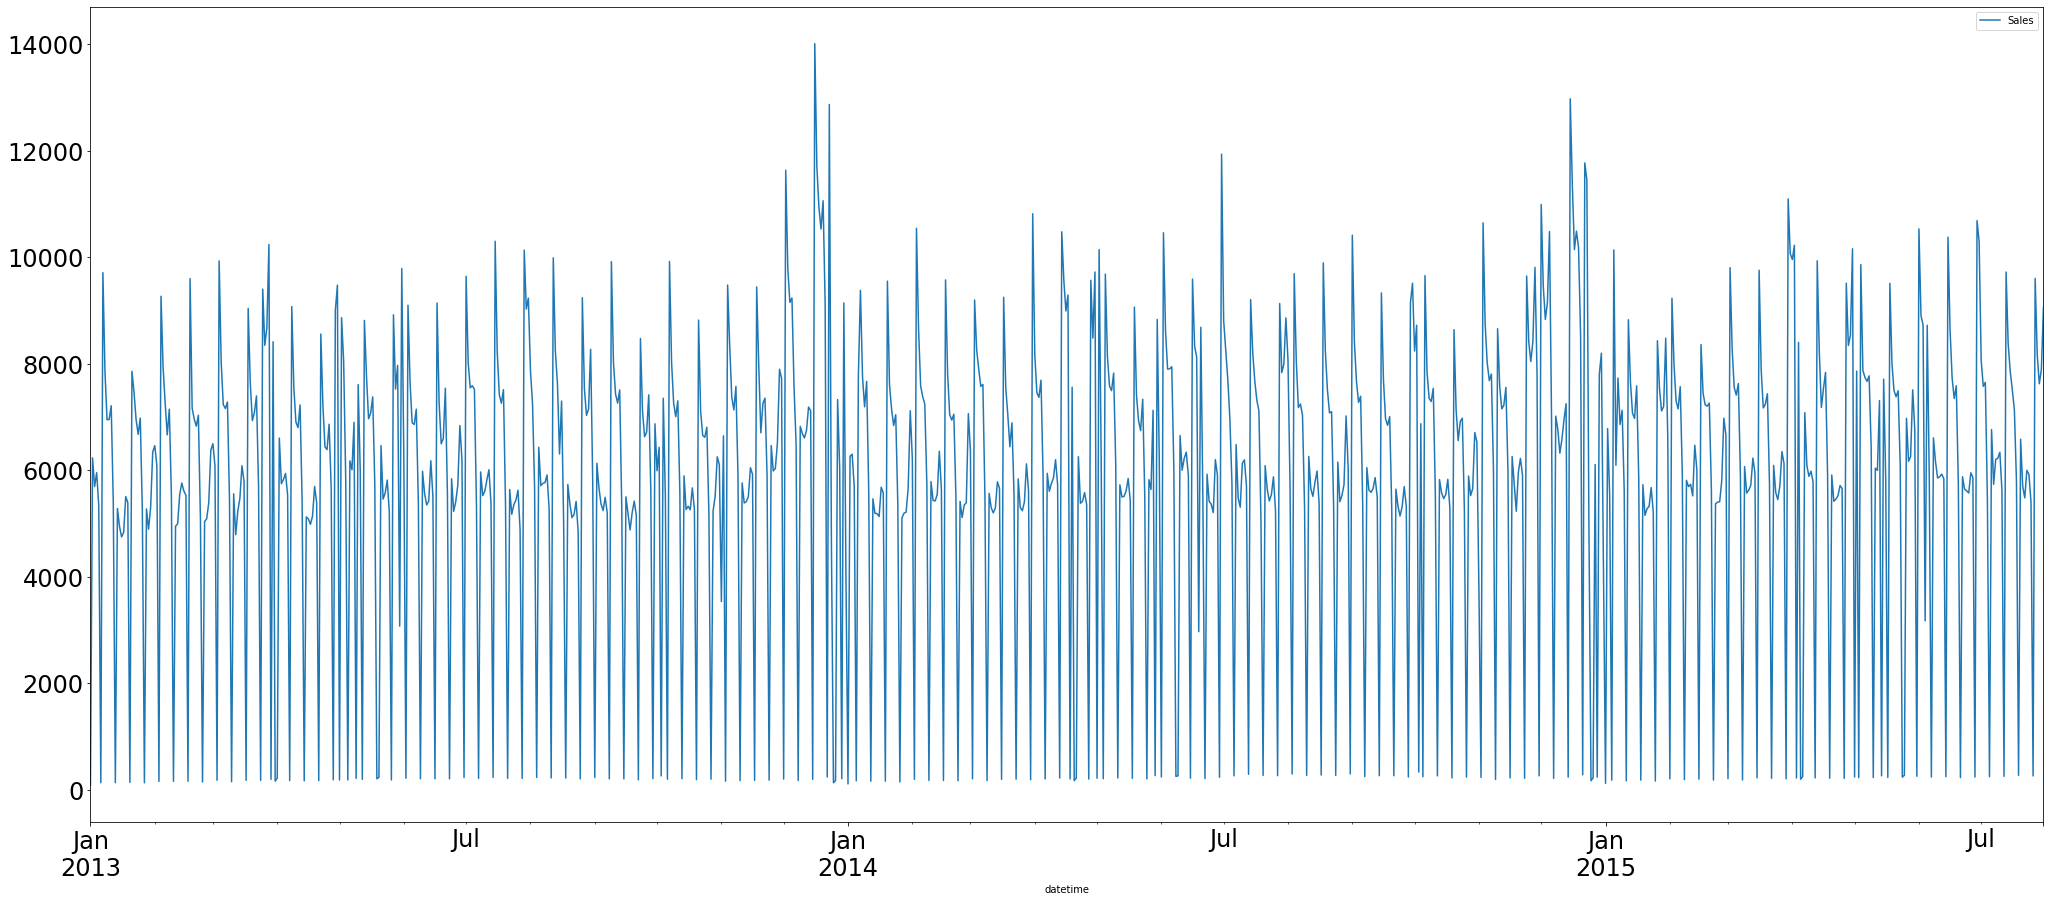

In [27]:
time_series_train_day = time_series_train.resample('D').mean()
time_series_train_day.plot(figsize=(35,15), fontsize=24)
plt.show()

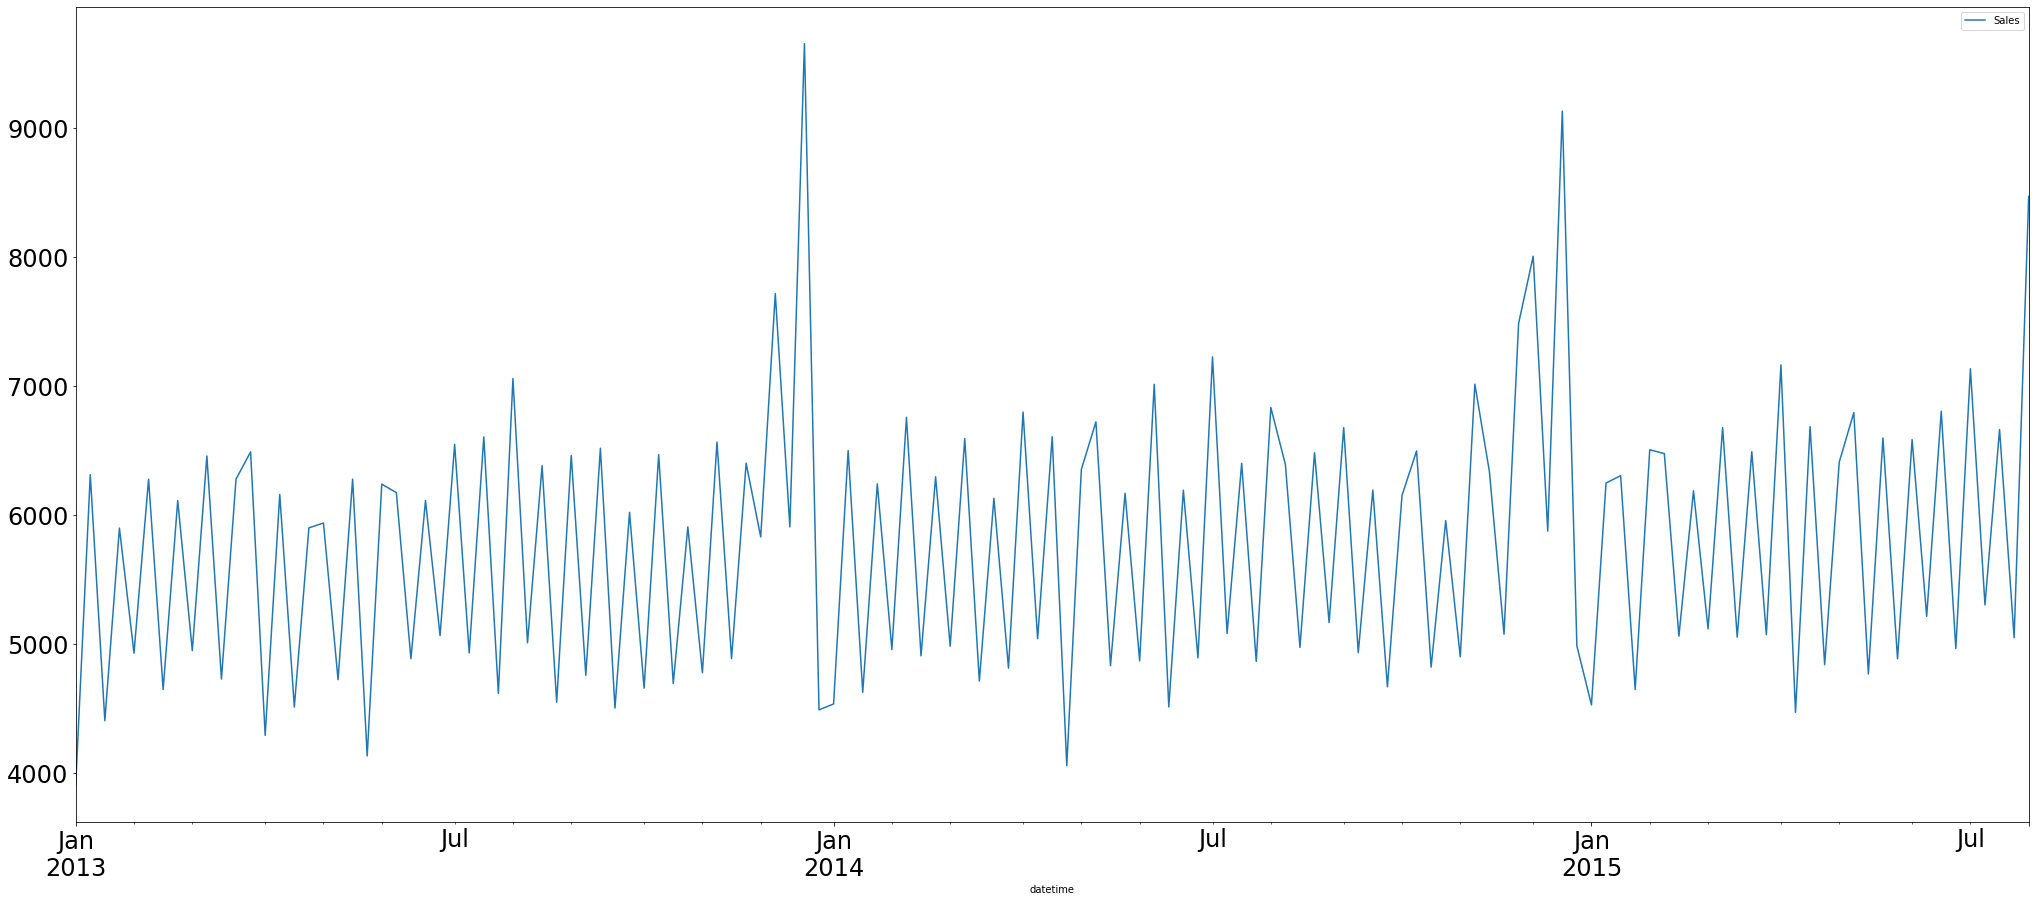

In [28]:
time_series_train_week = time_series_train.resample('W').mean()
time_series_train_week.plot(figsize=(35,15), fontsize=24)
plt.show()

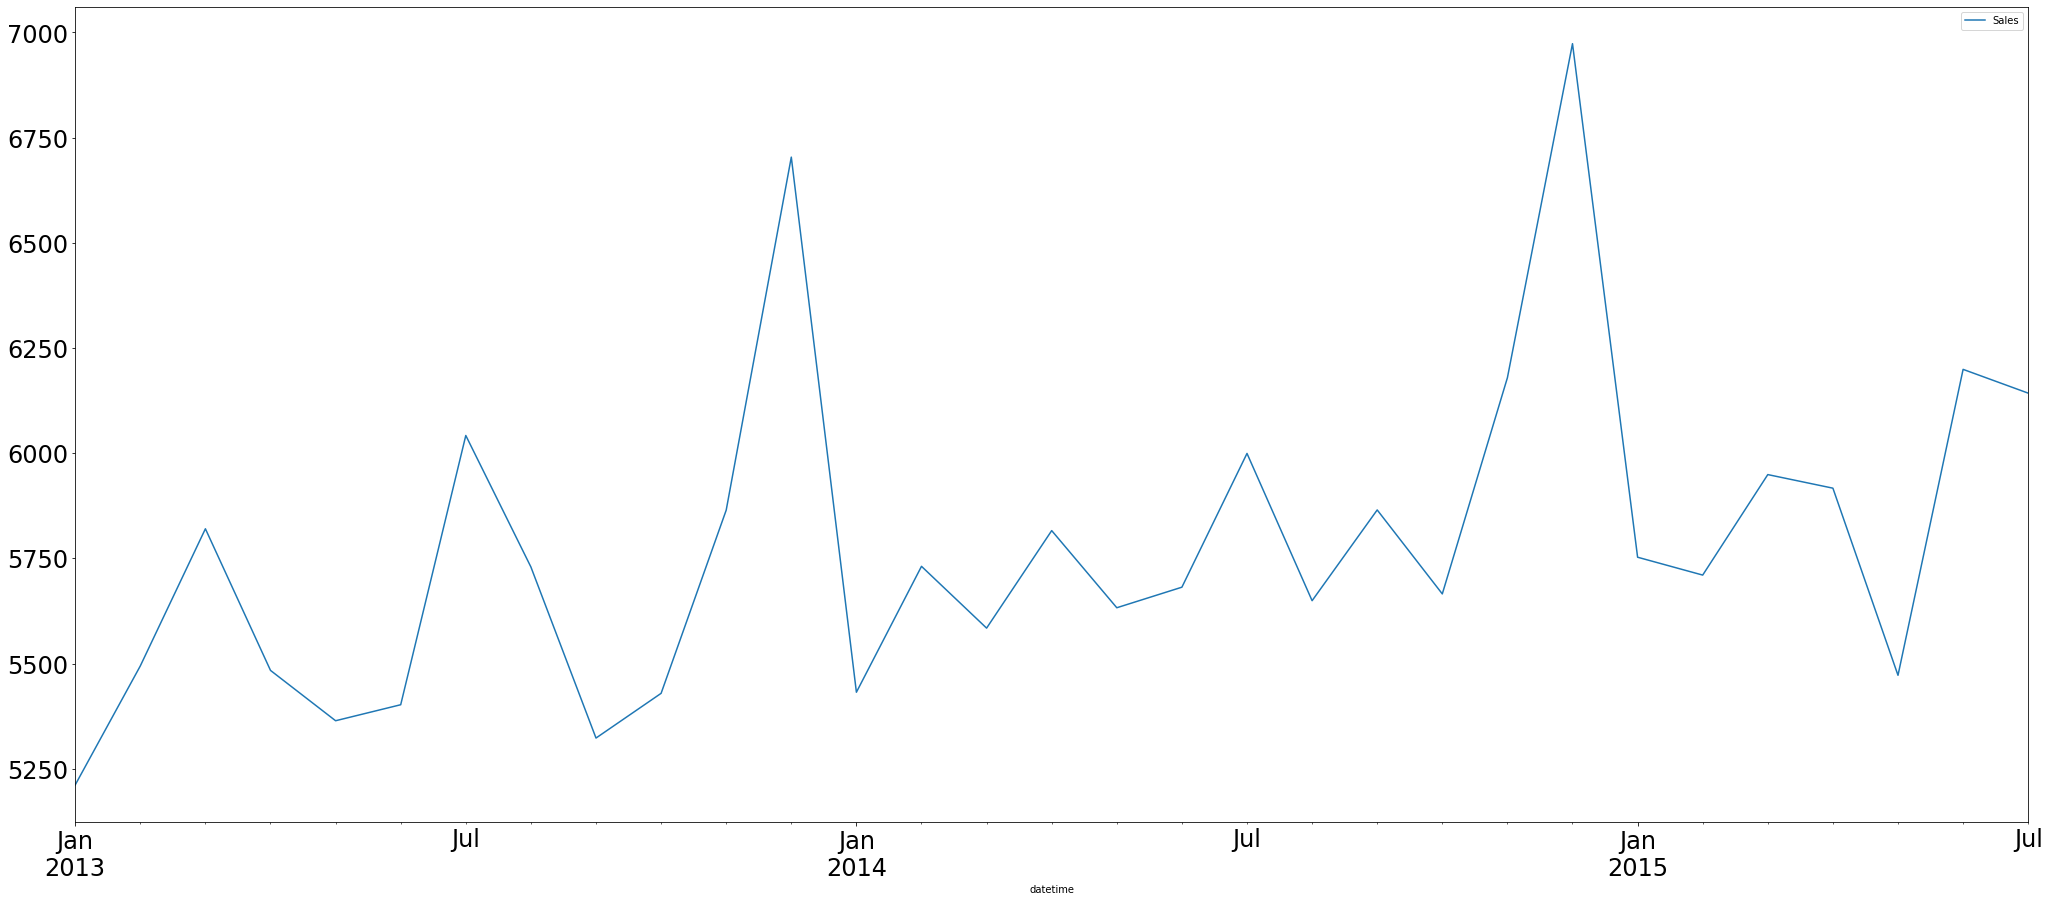

In [28]:
time_series_train_month = time_series_train.resample('M').mean()
time_series_train_month.plot(figsize=(35,15), fontsize=24)
plt.show()

 ** seasonality check of data series for test dataset **

In [29]:
# time_series_test = test_data[['Date','Sales']]
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,o,0
1,2,3,4,2015-09-17,1.0,1,o,0
2,3,7,4,2015-09-17,1.0,1,o,0
3,4,8,4,2015-09-17,1.0,1,o,0
4,5,9,4,2015-09-17,1.0,1,o,0


Note:
I couldn't say anything about the similarity of the train and test datasets since the I can't see the Sales column in test and can't analyse the seasonality in test dataset
from three graphs above we can see that the sales is peak on december 2013 and december 2014, for the reason that holidays are on december but as data scietist lets make it reasonable and data driven


# Check & compare sales behavior before, during and after holidays

In [55]:
# Create "Year", "Month" & "DayOfMonth" columns
train_data['Date']= pd.to_datetime(train_data['Date'], format= "%Y-%m-%d")
train_data["Year"] = train_data["Date"].apply(lambda x: x.year)
train_data["Month"] = train_data["Date"].apply(lambda x: x.month)
train_data["DayOfMonth"] = train_data["Date"].apply(lambda x: x.day)
train_data["WeekOfYear"] = train_data["Date"].apply(lambda x: x.weekofyear)

In [56]:
#lets extract the dataset for Chrismas holiday from train_data
chrismas_data = train_data[train_data['StateHoliday'] == "c"]
chrismas_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,WeekOfYear
241055,1,5,2014-12-26,0,0,0,0,c,1,2014,12,26,52
241056,2,5,2014-12-26,0,0,0,0,c,1,2014,12,26,52
241057,3,5,2014-12-26,0,0,0,0,c,1,2014,12,26,52
241058,4,5,2014-12-26,0,0,0,0,c,1,2014,12,26,52
241059,5,5,2014-12-26,0,0,0,0,c,1,2014,12,26,52


In [42]:
# Create "Year", "Month" & "DayOfMonth" columns
train_data['Date']= pd.to_datetime(train_data['Date'], format= "%Y-%m-%d")
train_data["Year"] = train_data["Date"].apply(lambda x: x.year)
train_data["Month"] = train_data["Date"].apply(lambda x: x.month)
train_data["DayOfMonth"] = train_data["Date"].apply(lambda x: x.day)
train_data["WeekOfYear"] = train_data["Date"].apply(lambda x: x.weekofyear)

In [57]:
#lets extract the dataset for Chrismas holiday from train_data
chrismas_data = train_data[train_data['StateHoliday'] == "c"]
chrismas_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,WeekOfYear
241055,1,5,2014-12-26,0,0,0,0,c,1,2014,12,26,52
241056,2,5,2014-12-26,0,0,0,0,c,1,2014,12,26,52
241057,3,5,2014-12-26,0,0,0,0,c,1,2014,12,26,52
241058,4,5,2014-12-26,0,0,0,0,c,1,2014,12,26,52
241059,5,5,2014-12-26,0,0,0,0,c,1,2014,12,26,52


In [58]:
christmas_data = train_store[(train_store['Month'] == 12) |(train_store['Month'] == 1)]

christmas_data.shape

(167244, 21)

In [59]:
c = '#386B7F' # basic color for plots


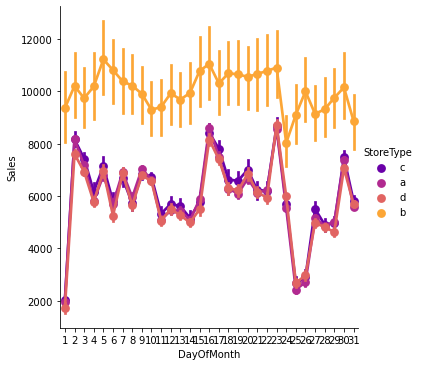

In [61]:
# sales trends
ax = sns.factorplot(data = christmas_data, x = 'DayOfMonth', y = "Sales", 
                # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
                # per promo in the store in rows
               color = c, fontsize=24)

# What can you say about the correlation between sales and number of customers?

In [60]:
data_corr = train_store[['Store','Sales','Customers',]]

<AxesSubplot:>

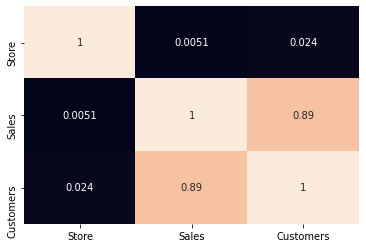

In [61]:
#correlation matrix
correlation = data_corr.corr()
sns.heatmap(correlation,annot = True,  cbar=False)

** Note: as we can see from the above figure there is strong correlation between sales and number of customer whith correllation of 0.89 **

# How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [63]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,o,1,c,a,1270.0,9,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,o,1,c,a,1270.0,9,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,o,1,c,a,1270.0,9,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,o,1,c,a,1270.0,9,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,o,1,c,a,1270.0,9,2008.0,0,NaN,NaN,NaN


In [64]:
promo_sales = train_store[['Store','Promo','Promo2','Sales',"Customers"]]
promo_sales.head()

,Store,Promo,Promo2,Sales,Customers
0,1,1,0,5263,555
1,1,1,0,5020,546
2,1,1,0,4782,523
3,1,1,0,5011,560
4,1,1,0,6102,612


In [65]:
promo_sales[promo_sales['Promo'] ==1].Customers.sum()

318263948

In [66]:
promo_sales_grouped = promo_sales.groupby(["Promo"])[['Sales','Customers']].sum()
promo_sales_grouped

,Sales,Customers
Promo,,
0,2771974337,325777807
1,3101206286,318263948


In [67]:
sales0 = promo_sales_grouped.iloc[0,0]
sales1 = promo_sales_grouped.iloc[1,0]
cust0 = promo_sales_grouped.iloc[0,1]
cust1 = promo_sales_grouped.iloc[1,1]


In [68]:
percentage_change_sales = ((sales1 - sales0)/sales0) * 100
percentage_change_cust = ((cust1-cust0)/cust0) *100
print("Percentage increase in Sales is " + str(percentage_change_sales) + "%")
print("Percentage increase in Customer is " + str(percentage_change_cust) + "%")

Percentage increase in Sales is 11.877164395263302%
Percentage increase in Customer is -2.3064367303571416%


Text(0.5, 1.0, 'Promo vs Sales')

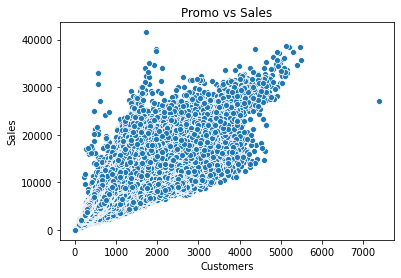

In [69]:
ax = sns.scatterplot(x='Customers', y="Sales",data=promo_sales )
ax.set_title('Promo vs Sales')

Text(0.5, 1.0, 'Promo vs Sales')

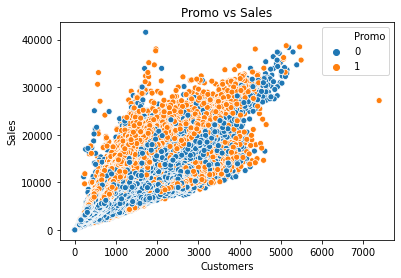

In [70]:
ax = sns.scatterplot(x='Customers', y="Sales",hue="Promo",data=promo_sales )
ax.set_title('Promo vs Sales')

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

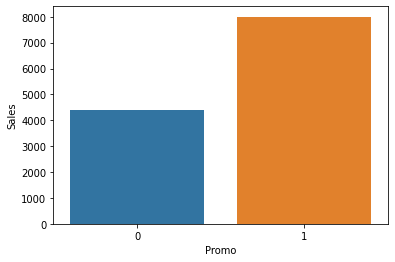

In [71]:
sns.barplot(x='Promo', y="Sales", data=promo_sales )

Note: there is 11.877% increase during promotion on sales and therefore Promo while there is decress of 2.3% in customer

# Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

In [73]:
promos_store = train_store[['Store','StoreType','Promo','Sales','Customers']]

In [74]:
promos_store = promos_store.groupby(['StoreType',"Promo"]).\
                agg({'Store':"count","Sales":"sum","Customers":"sum"})
promos_store

Store       Sales  Customers
StoreType Promo                               
a         0      341123  1466971549  180276608
          1      210504  1698363310  183264826
b         0        9784    92061910   18685985
          1        6046    67169485   12779636
c         0       84596   375186657   47222206
          1       52244   408034769   44907499
d         0      193626   837754221   79593008
          1      119286   927638722   77311987

Note: as we can see from above table if we deploy promo in StoreType a we can both attract more customer and there is a huge increase in Sales relative to the other stores

# Trends of customer behavior during store open and closing times

since we have cleaned our data before lets bring the data again to see the customer behaviour during the store is open or closed

In [77]:
#bringing in the data again for this question sake
train_before_cleaning = pd.read_csv('../data/train.csv')
train_before_cleaning.head()

/home/natty/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [78]:
train_before_cleaning[train_before_cleaning['Open'] == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [79]:
data_open_state = train_before_cleaning[['Open','Customers']]
data_open_state = data_open_state.groupby(['Open']).agg({"Customers":'sum'})
data_open_state

,Customers
Open,
0,0
1,644041755


<AxesSubplot:xlabel='Open', ylabel='Customers'>

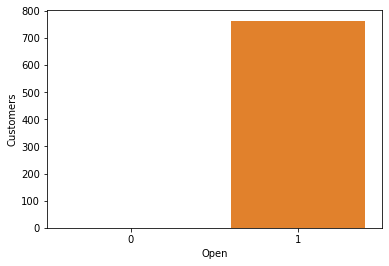

In [80]:
sns.barplot(x="Open",y='Customers', data=train_before_cleaning)

Note: from this the trends as expected when the Pharmaceutical is closed there is no customer, All the customer interacts with the pharmaceutical when it is opened

# Which stores are opened on all weekdays? How does that affect their sales on weekends?

In [81]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,o,1,c,a,1270.0,9,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,o,1,c,a,1270.0,9,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,o,1,c,a,1270.0,9,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,o,1,c,a,1270.0,9,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,o,1,c,a,1270.0,9,2008.0,0,NaN,NaN,NaN


In [82]:
weekday_data = train_store[['Open', "DayOfWeek","StoreType",'Sales']]

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

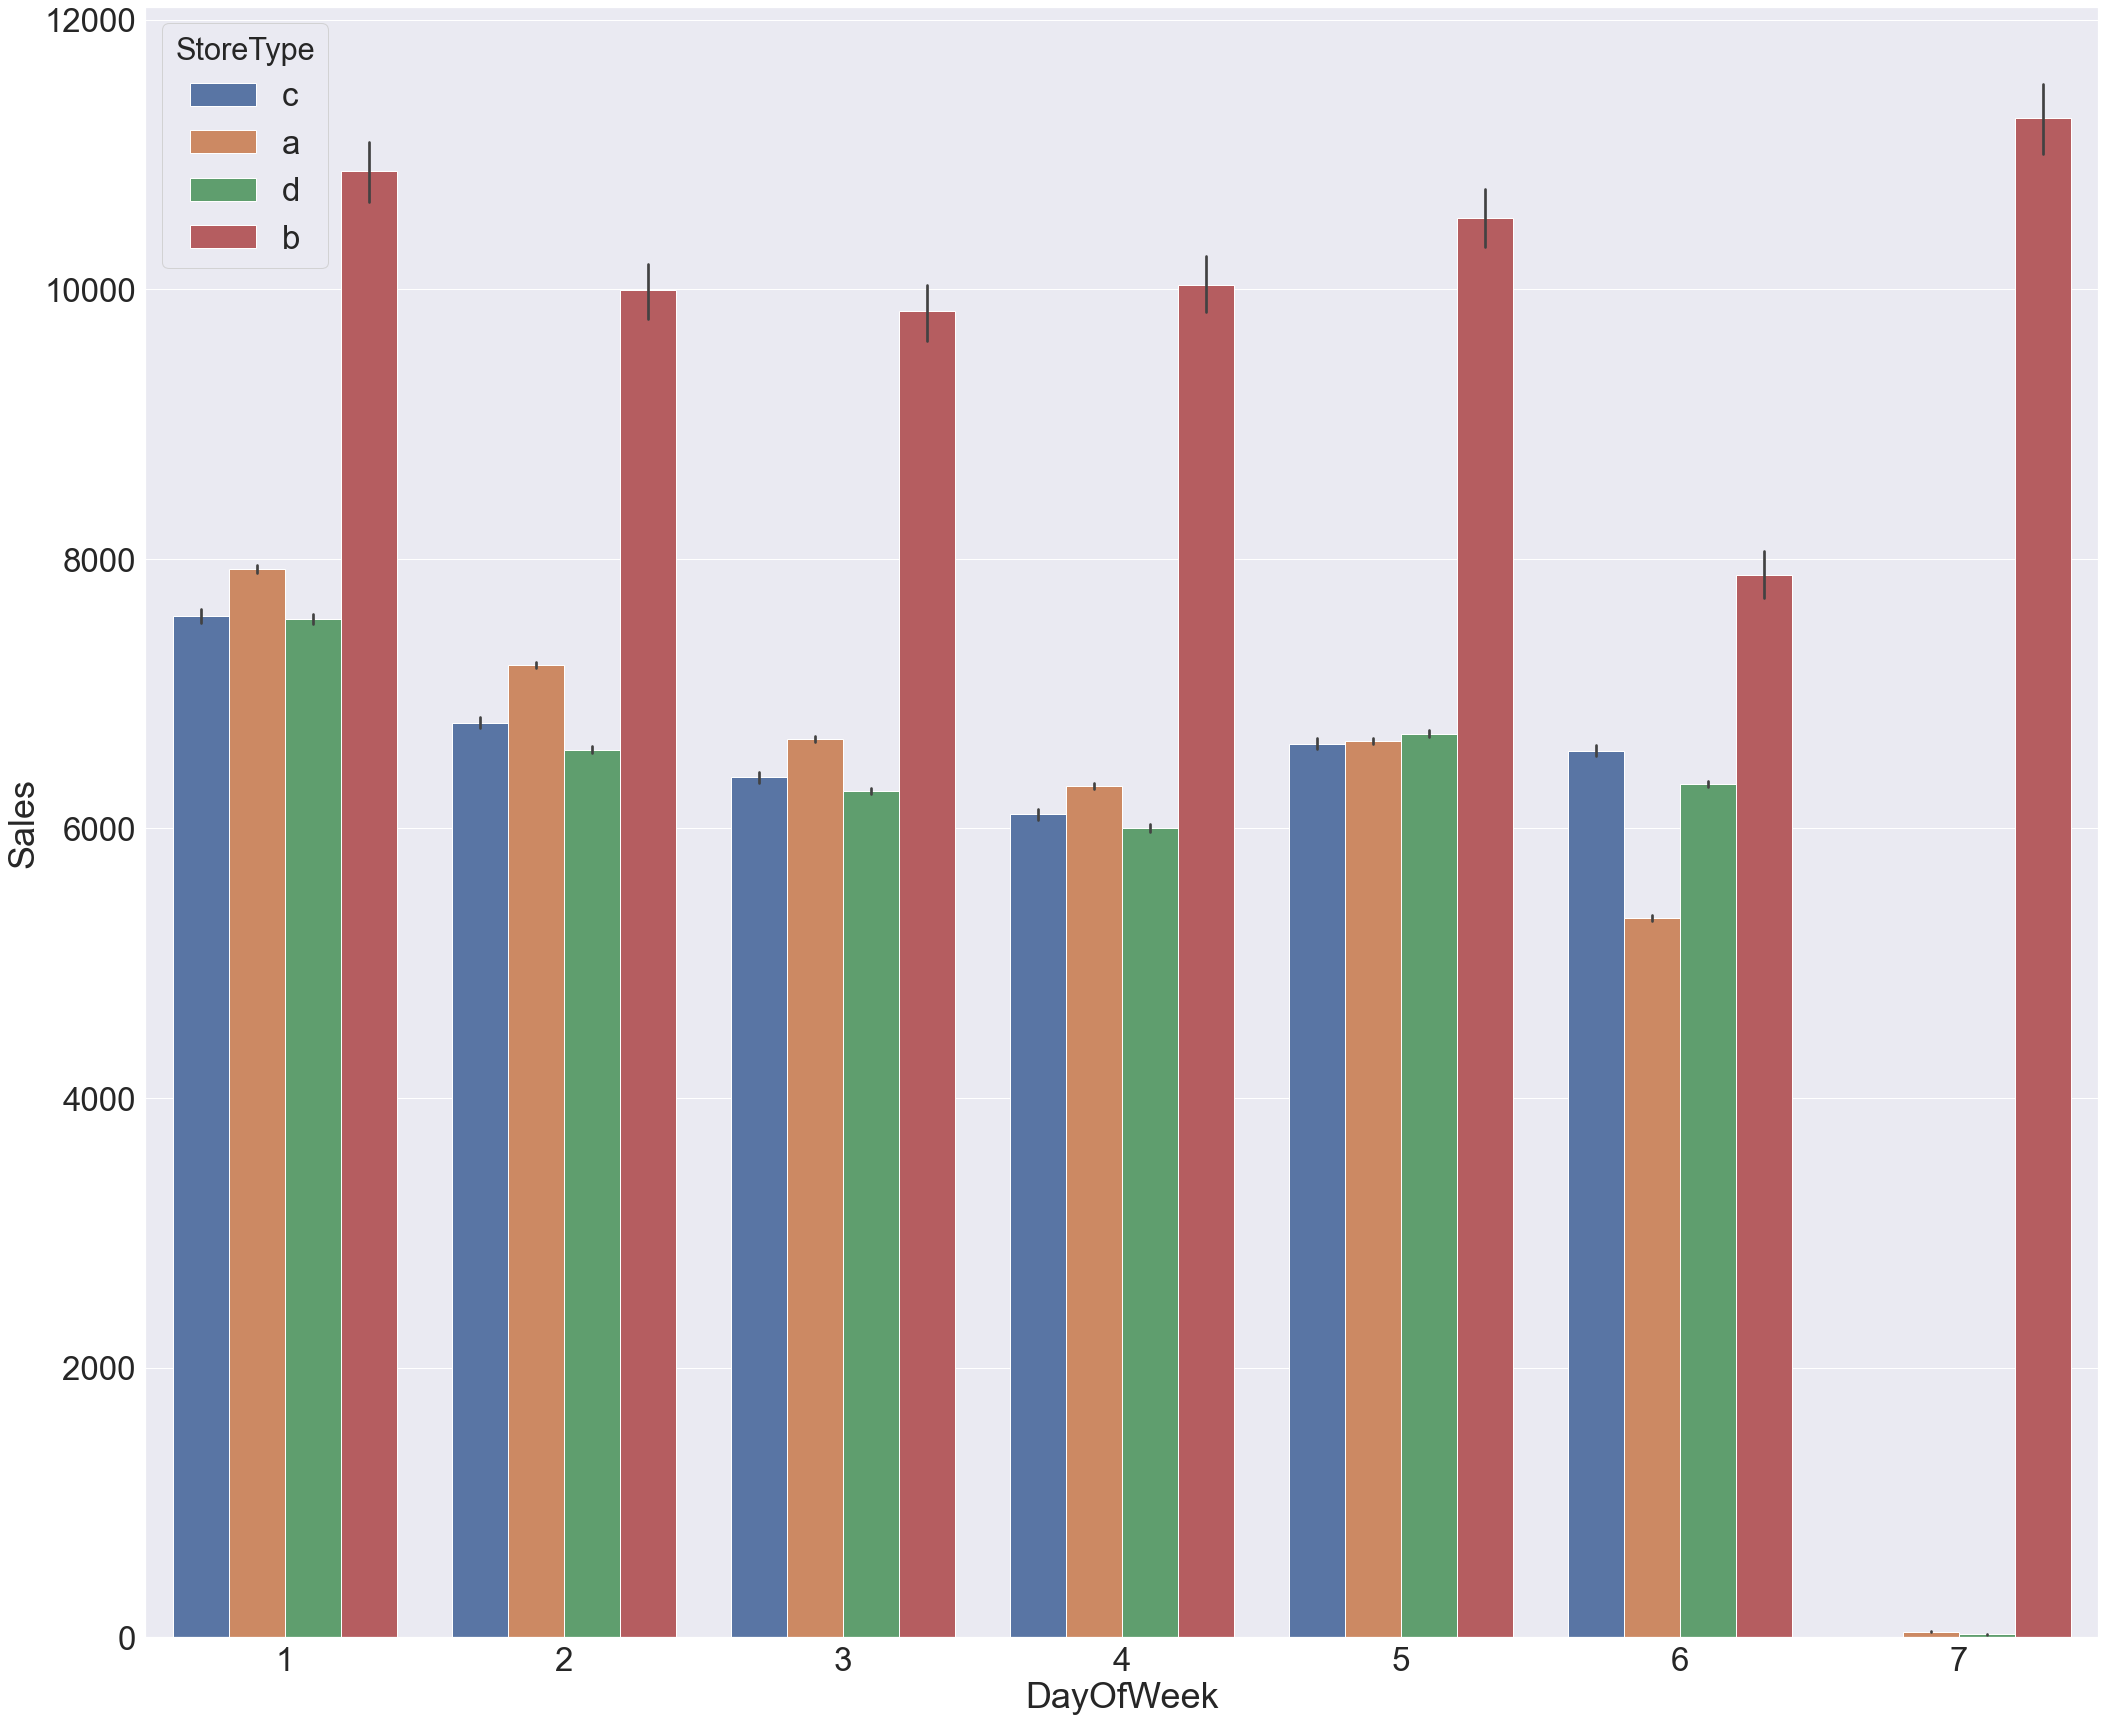

In [83]:
sns.set(font_scale=3)  
plt.figure(figsize=(35,30))
sns.barplot(x="DayOfWeek", y="Sales", hue="StoreType", data=weekday_data)

Note: from above figure we can see that all Store Types are working all weekdays except Store Type c. and the effect as seen on the 7th day from the figure above the Store Type c is kind have kind of low overall sales as shown in the figure below

In [62]:
weekday_data1 = train_store.groupby(['StoreType']).agg({"DayOfWeek":"count","Sales":'sum'})

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

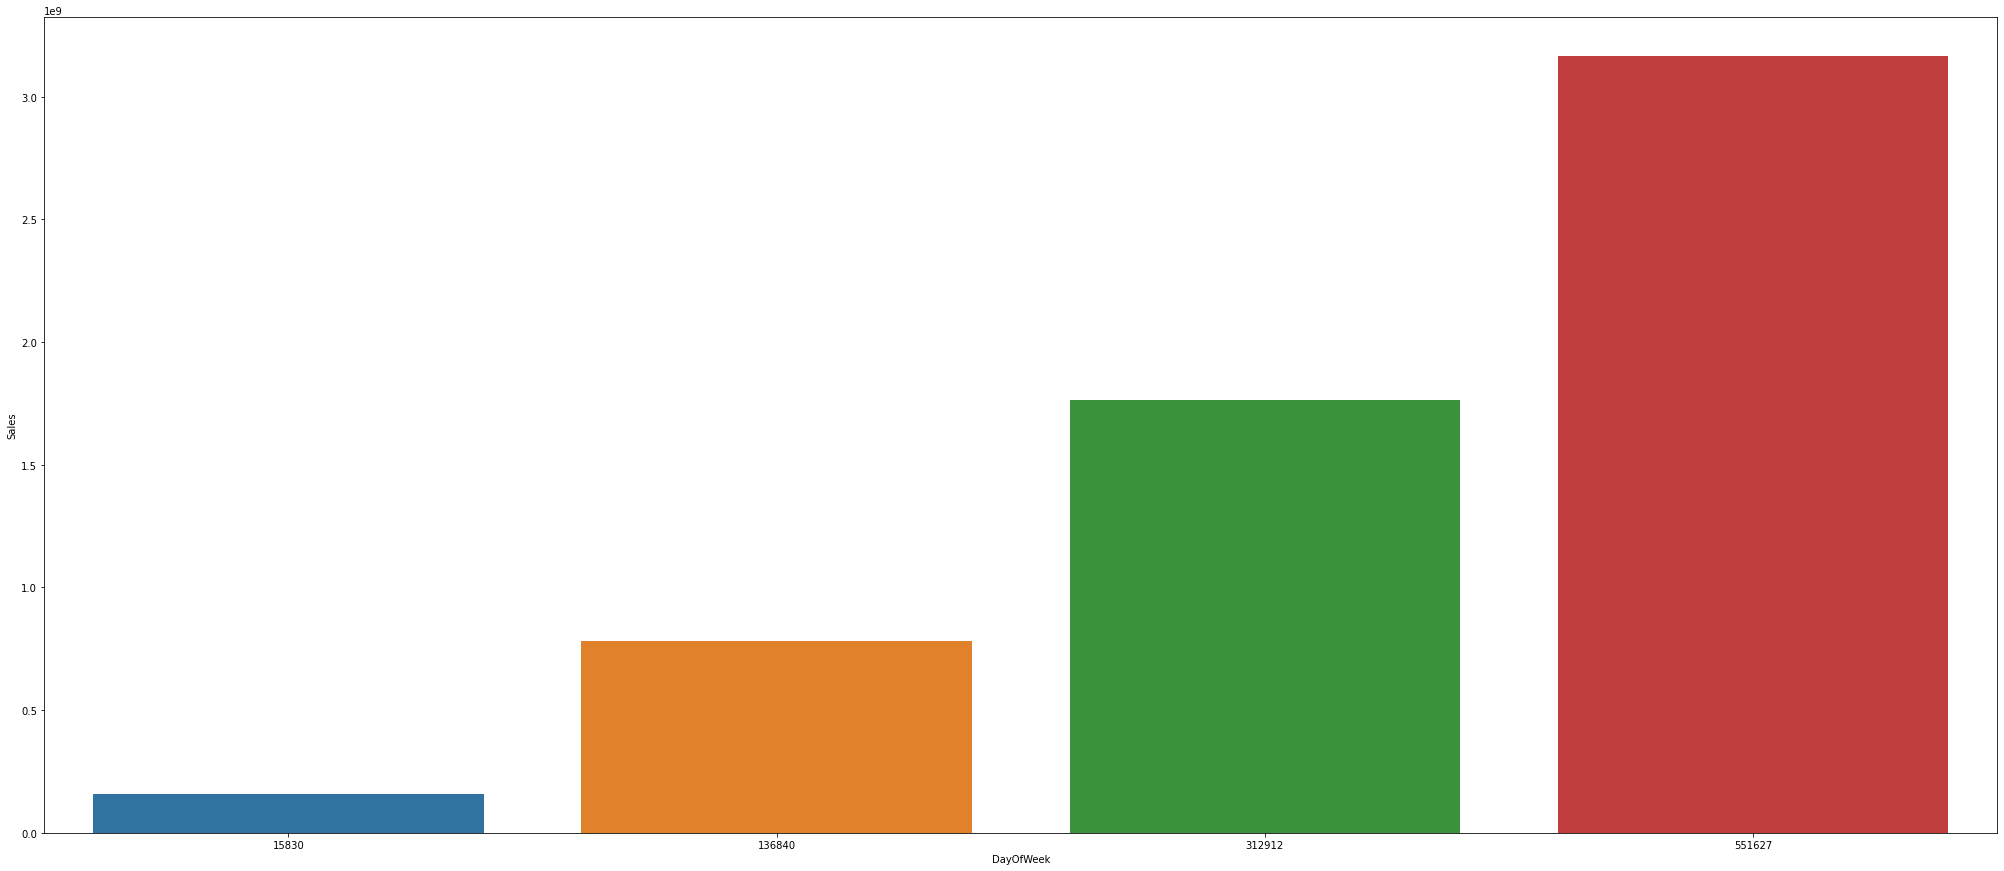

In [63]:
plt.figure(figsize=(35,15))
sns.barplot(x="DayOfWeek", y="Sales", data=weekday_data1)

# Check how the assortment type affects sales

In [64]:
# extractng Assortment data to be used for this analysis
assort_data = train_store[['Assortment','Sales']]

In [65]:
assort_data.nunique()

Assortment        3
Sales         21734
dtype: int64

<AxesSubplot:xlabel='Assortment', ylabel='Sales'>

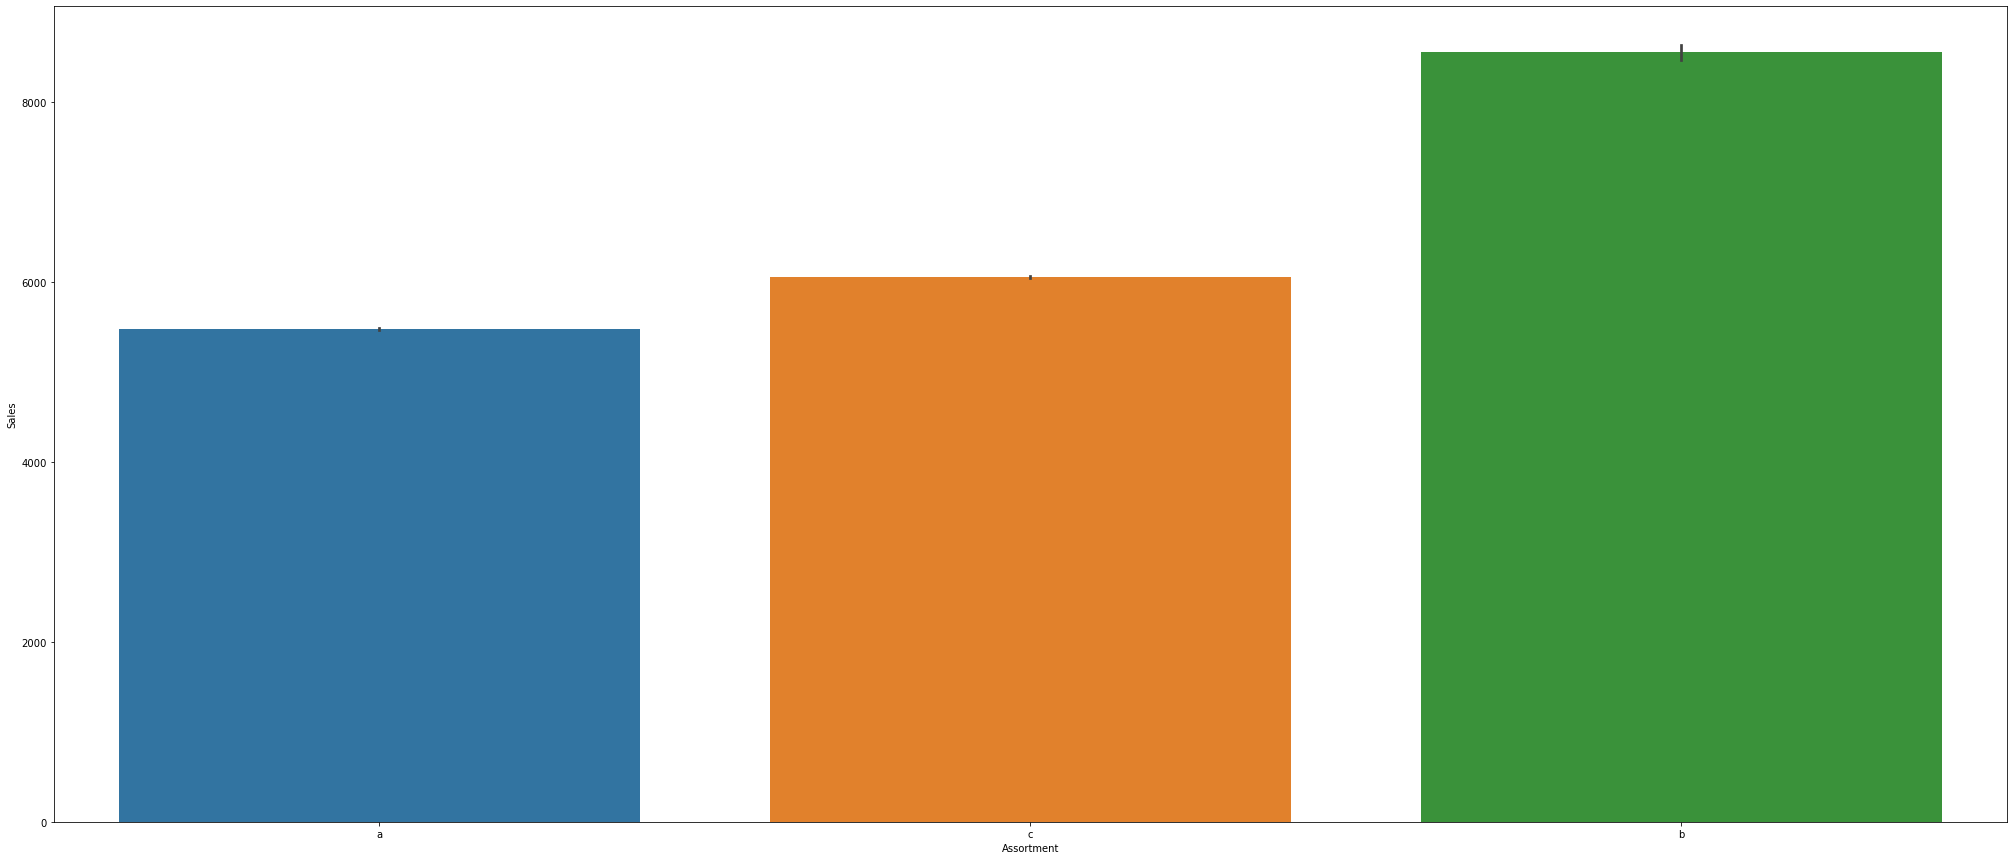

In [66]:
# visulazing the above data we use bar plot this Assortment is categorical
plt.figure(figsize=(35,15))
sns.barplot(x="Assortment", y="Sales", data=assort_data)

In [67]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,DayOfMonth,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,o,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,o,1,2015,...,30,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,o,1,2015,...,29,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,o,1,2015,...,28,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,o,1,2015,...,27,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


# How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

In [68]:
distance_data = train_store[['CompetitionDistance','Sales']]
distance_data = distance_data.groupby(['CompetitionDistance']).agg({"Sales":"sum"})
distance_data.max()

Sales    76259307
dtype: int64

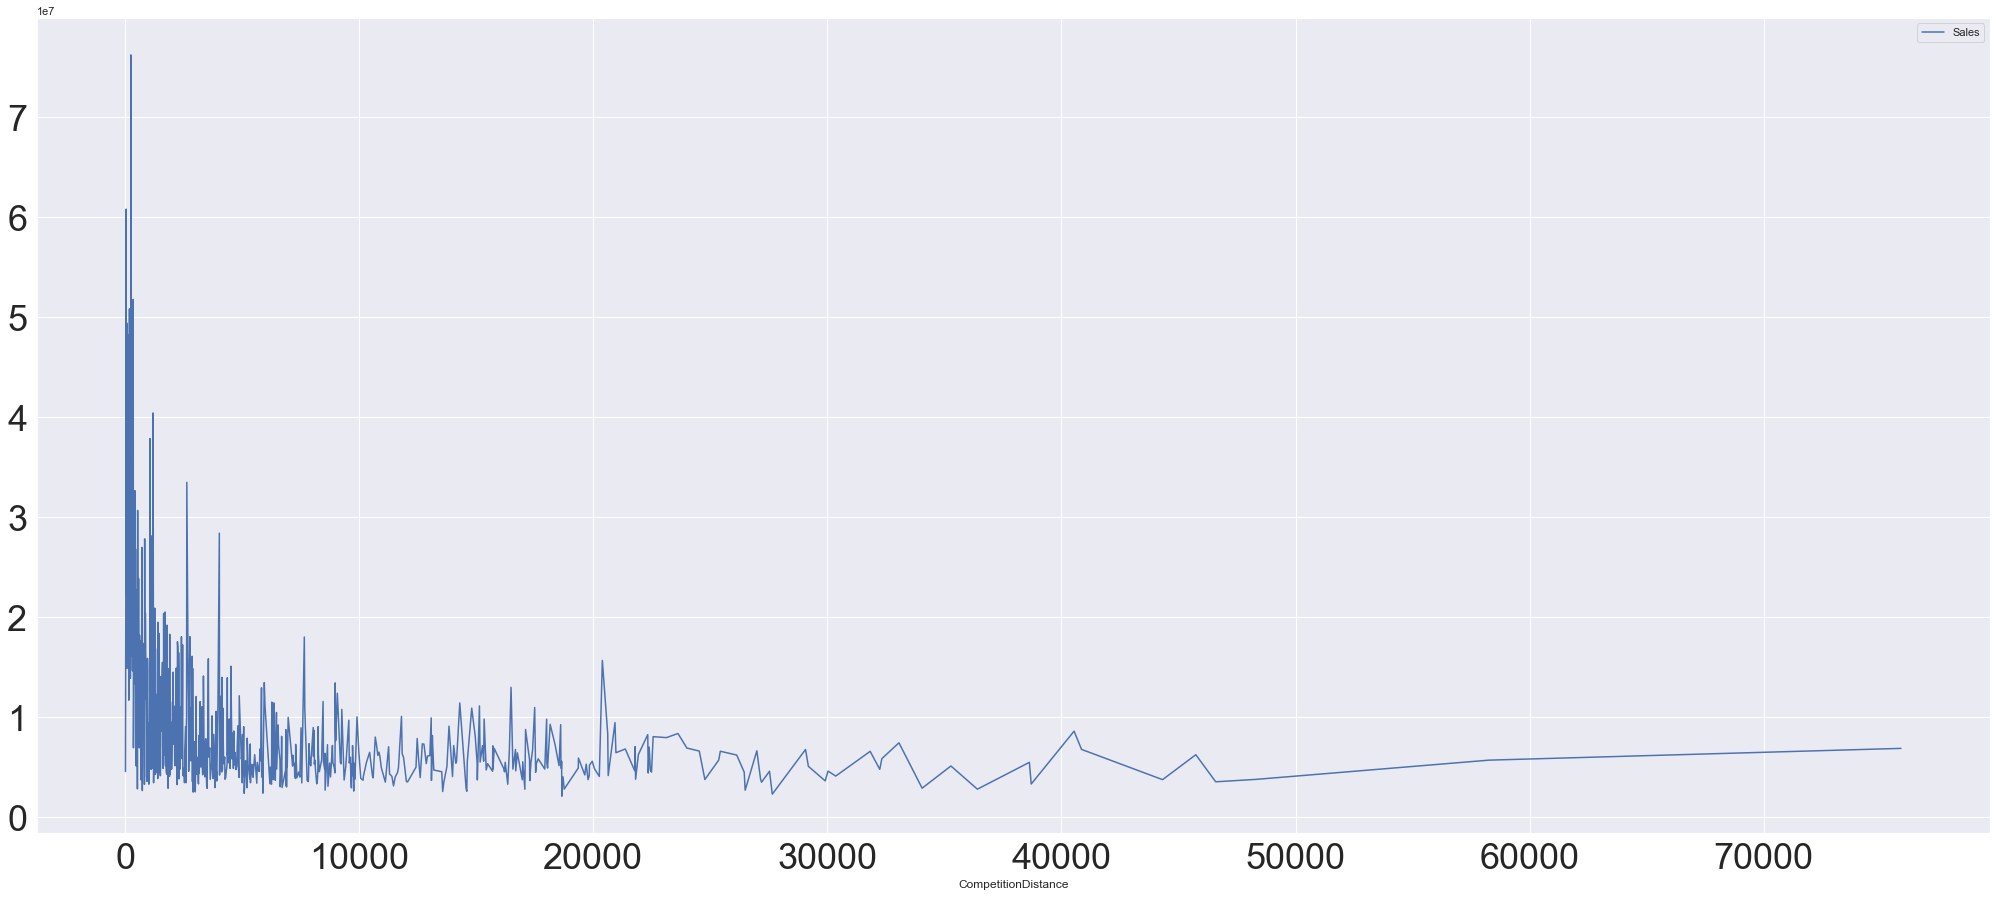

In [69]:
sns.set(font_scale=1)  

distance_data.plot(figsize=(35,15), fontsize=36)
plt.show()

 The less the competition distance the more the sales and as the competion distance increases the sales decreases.